<a href="https://colab.research.google.com/github/BoluAkinlawon/Sparks-Foundation-Work/blob/main/Divvy_Bikes_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
import pyspark
import pandas as pd
import glob

In [ ]:
#csv_files = glob.glob('*.csv')

In [ ]:
#dfs = []

In [ ]:
#for file in csv_files:
#   df = pd.read_csv(file)
 #  dfs.append(df)


In [ ]:
#merged_df = pd.concat(dfs, ignore_index=True)


In [ ]:
#merged_df.to_csv('merged_dataset.csv', index=False)

In [ ]:
divvy_df = pd.read_csv("merged_dataset.csv")
divvy_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,23/05/2022 23:06,23/05/2022 23:40,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,11/05/2022 08:53,11/05/2022 09:31,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,26/05/2022 18:36,26/05/2022 18:58,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,10/05/2022 07:30,10/05/2022 07:38,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,10/05/2022 17:31,10/05/2022 17:36,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055247,B8F5BDBFAE7195E6,classic_bike,2022-09-15 17:31:15,2022-09-15 17:45:02,State St & Randolph St,TA1305000029,McClurg Ct & Ohio St,TA1306000029,41.884621,-87.627834,41.892592,-87.617289,member
3055248,9332335BF567902E,electric_bike,2022-09-21 08:23:51,2022-09-21 08:29:29,Michigan Ave & Jackson Blvd,TA1309000002,Stetson Ave & South Water St,TA1308000029,41.877843,-87.624083,41.886835,-87.622320,member
3055249,B803083F632A9E74,docked_bike,2022-09-21 14:46:04,2022-09-21 15:18:02,Michigan Ave & Jackson Blvd,TA1309000002,Adler Planetarium,13431,41.877850,-87.624080,41.866095,-87.607267,casual
3055250,CD0124BB37C72190,classic_bike,2022-09-06 15:17:00,2022-09-06 15:25:12,State St & Randolph St,TA1305000029,McClurg Ct & Ohio St,TA1306000029,41.884621,-87.627834,41.892592,-87.617289,member


DATA EXPLORATION

In [ ]:
divvy_df.isnull().sum()

ride_id                    0
rideable_type              1
started_at                 1
ended_at                   1
start_station_name    443011
start_station_id      443011
end_station_name      474134
end_station_id        474134
start_lat                  1
start_lng                  1
end_lat                 3579
end_lng                 3579
member_casual              1
dtype: int64

In [ ]:
divvy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055252 entries, 0 to 3055251
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 303.0+ MB


In [ ]:
divvy_df.dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,23/05/2022 23:06,23/05/2022 23:40,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,11/05/2022 08:53,11/05/2022 09:31,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,26/05/2022 18:36,26/05/2022 18:58,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,10/05/2022 07:30,10/05/2022 07:38,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,10/05/2022 17:31,10/05/2022 17:36,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055246,5556A10A1BB5A00A,electric_bike,2022-09-04 19:34:22,2022-09-04 19:45:03,Canal St & Jackson Blvd,13138,Stetson Ave & South Water St,TA1308000029,41.877412,-87.640076,41.886835,-87.622320,member
3055247,B8F5BDBFAE7195E6,classic_bike,2022-09-15 17:31:15,2022-09-15 17:45:02,State St & Randolph St,TA1305000029,McClurg Ct & Ohio St,TA1306000029,41.884621,-87.627834,41.892592,-87.617289,member
3055248,9332335BF567902E,electric_bike,2022-09-21 08:23:51,2022-09-21 08:29:29,Michigan Ave & Jackson Blvd,TA1309000002,Stetson Ave & South Water St,TA1308000029,41.877843,-87.624083,41.886835,-87.622320,member
3055249,B803083F632A9E74,docked_bike,2022-09-21 14:46:04,2022-09-21 15:18:02,Michigan Ave & Jackson Blvd,TA1309000002,Adler Planetarium,13431,41.877850,-87.624080,41.866095,-87.607267,casual


In [ ]:
divvy_df.shape

(3055252, 13)

In [ ]:
divvy_df.isnull().sum()

ride_id                    0
rideable_type              1
started_at                 1
ended_at                   1
start_station_name    443011
start_station_id      443011
end_station_name      474134
end_station_id        474134
start_lat                  1
start_lng                  1
end_lat                 3579
end_lng                 3579
member_casual              1
dtype: int64

In [ ]:
#Drop the id columns
divvy_df.columns
# Drop multiple columns
columns_to_drop = ['ride_id', 'start_station_id', 'end_station_id']
divvy_df.drop(columns=columns_to_drop, inplace=True)




In [ ]:
divvy_df

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,23/05/2022 23:06,23/05/2022 23:40,Wabash Ave & Grand Ave,Halsted St & Roscoe St,41.891466,-87.626761,41.943670,-87.648950,member
1,classic_bike,11/05/2022 08:53,11/05/2022 09:31,DuSable Lake Shore Dr & Monroe St,Field Blvd & South Water St,41.880958,-87.616743,41.886349,-87.617517,member
2,classic_bike,26/05/2022 18:36,26/05/2022 18:58,Clinton St & Madison St,Wood St & Milwaukee Ave,41.882242,-87.641066,41.907655,-87.672552,member
3,classic_bike,10/05/2022 07:30,10/05/2022 07:38,Clinton St & Madison St,Clark St & Randolph St,41.882242,-87.641066,41.884576,-87.631890,member
4,classic_bike,10/05/2022 17:31,10/05/2022 17:36,Clinton St & Madison St,Morgan St & Lake St,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...
3055247,classic_bike,2022-09-15 17:31:15,2022-09-15 17:45:02,State St & Randolph St,McClurg Ct & Ohio St,41.884621,-87.627834,41.892592,-87.617289,member
3055248,electric_bike,2022-09-21 08:23:51,2022-09-21 08:29:29,Michigan Ave & Jackson Blvd,Stetson Ave & South Water St,41.877843,-87.624083,41.886835,-87.622320,member
3055249,docked_bike,2022-09-21 14:46:04,2022-09-21 15:18:02,Michigan Ave & Jackson Blvd,Adler Planetarium,41.877850,-87.624080,41.866095,-87.607267,casual
3055250,classic_bike,2022-09-06 15:17:00,2022-09-06 15:25:12,State St & Randolph St,McClurg Ct & Ohio St,41.884621,-87.627834,41.892592,-87.617289,member


In [ ]:
divvy_df.dropna(inplace = True)
divvy_df.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [ ]:
divvy_df.to_csv('cleaned_dataset.csv', index=False)


ANALYSIS USING PYSPARK

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Divvy').getOrCreate()

In [ ]:
spark

DATA EXPLORATION

In [ ]:
spark

In [ ]:
##Read the dataset
divvy_df = spark.read.option('header', 'true').csv('cleaned_dataset.csv', inferSchema = True)

In [ ]:
##Check the schema
divvy_df.printSchema()

root
 |-- rideable_type: string (nullable = true)
 |-- started_at: string (nullable = true)
 |-- ended_at: string (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- start_lat: double (nullable = true)
 |-- start_lng: double (nullable = true)
 |-- end_lat: double (nullable = true)
 |-- end_lng: double (nullable = true)
 |-- member_casual: string (nullable = true)



In [ ]:
divvy_df = spark.read.csv('cleaned_dataset.csv', header = True, inferSchema = True)
divvy_df.show()

+-------------+----------------+----------------+--------------------+--------------------+-----------+------------+-----------+------------+-------------+
|rideable_type|      started_at|        ended_at|  start_station_name|    end_station_name|  start_lat|   start_lng|    end_lat|     end_lng|member_casual|
+-------------+----------------+----------------+--------------------+--------------------+-----------+------------+-----------+------------+-------------+
| classic_bike|23/05/2022 23:06|23/05/2022 23:40|Wabash Ave & Gran...|Halsted St & Rosc...|  41.891466|  -87.626761|   41.94367|   -87.64895|       member|
| classic_bike|11/05/2022 08:53|11/05/2022 09:31|DuSable Lake Shor...|Field Blvd & Sout...|  41.880958|  -87.616743|41.88634906|-87.61751655|       member|
| classic_bike|26/05/2022 18:36|26/05/2022 18:58|Clinton St & Madi...|Wood St & Milwauk...|  41.882242|  -87.641066|  41.907655|  -87.672552|       member|
| classic_bike|10/05/2022 07:30|10/05/2022 07:38|Clinton St & Ma

In [ ]:
divvy_df.describe().show()

+-------+-------------+----------------+----------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------+
|summary|rideable_type|      started_at|        ended_at|  start_station_name|    end_station_name|           start_lat|          start_lng|            end_lat|             end_lng|member_casual|
+-------+-------------+----------------+----------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------+
|  count|      2372752|         2372752|         2372752|             2372752|             2372752|             2372752|            2372752|            2372752|             2372752|      2372752|
|   mean|         null|            null|            null|                null|                null|   41.90376524342244| -87.64491458030183| 41.904109389131484|   -87.6451705413892|         null|
| stddev|         nu

In [ ]:
type(divvy_df)

pyspark.sql.dataframe.DataFrame

In [ ]:
divvy_df.head(3)

[Row(rideable_type='classic_bike', started_at='23/05/2022 23:06', ended_at='23/05/2022 23:40', start_station_name='Wabash Ave & Grand Ave', end_station_name='Halsted St & Roscoe St', start_lat=41.891466, start_lng=-87.626761, end_lat=41.94367, end_lng=-87.64895, member_casual='member'),
 Row(rideable_type='classic_bike', started_at='11/05/2022 08:53', ended_at='11/05/2022 09:31', start_station_name='DuSable Lake Shore Dr & Monroe St', end_station_name='Field Blvd & South Water St', start_lat=41.880958, start_lng=-87.616743, end_lat=41.88634906, end_lng=-87.61751655, member_casual='member'),
 Row(rideable_type='classic_bike', started_at='26/05/2022 18:36', ended_at='26/05/2022 18:58', start_station_name='Clinton St & Madison St', end_station_name='Wood St & Milwaukee Ave', start_lat=41.882242, start_lng=-87.641066, end_lat=41.907655, end_lng=-87.672552, member_casual='member')]

In [ ]:
divvy_df.select('end_station_name').show()

+--------------------+
|    end_station_name|
+--------------------+
|Halsted St & Rosc...|
|Field Blvd & Sout...|
|Wood St & Milwauk...|
|Clark St & Randol...|
| Morgan St & Lake St|
|Sangamon St & Was...|
|Wood St & Augusta...|
|Southport Ave & C...|
|Clybourn Ave & Di...|
|N Southport Ave &...|
|Dayton St & North...|
|Wabash Ave & Roos...|
|Blackstone Ave & ...|
|Ashland Ave & Bla...|
|Albany Ave & Mont...|
|Wabash Ave & 16th St|
|Michigan Ave & Wa...|
|Sheffield Ave & W...|
|Larrabee St & Kin...|
|Desplaines St & K...|
+--------------------+
only showing top 20 rows



In [ ]:
record_count = divvy_df.count()

In [ ]:
print("Number of records:", record_count)

Number of records: 2372752


In [ ]:
divvy_df.show(5)


+-------------+----------------+----------------+--------------------+--------------------+---------+----------+-----------+------------+-------------+
|rideable_type|      started_at|        ended_at|  start_station_name|    end_station_name|start_lat| start_lng|    end_lat|     end_lng|member_casual|
+-------------+----------------+----------------+--------------------+--------------------+---------+----------+-----------+------------+-------------+
| classic_bike|23/05/2022 23:06|23/05/2022 23:40|Wabash Ave & Gran...|Halsted St & Rosc...|41.891466|-87.626761|   41.94367|   -87.64895|       member|
| classic_bike|11/05/2022 08:53|11/05/2022 09:31|DuSable Lake Shor...|Field Blvd & Sout...|41.880958|-87.616743|41.88634906|-87.61751655|       member|
| classic_bike|26/05/2022 18:36|26/05/2022 18:58|Clinton St & Madi...|Wood St & Milwauk...|41.882242|-87.641066|  41.907655|  -87.672552|       member|
| classic_bike|10/05/2022 07:30|10/05/2022 07:38|Clinton St & Madi...|Clark St & Randol.

In [ ]:
from pyspark.sql.functions import count, when, isnull

missing_values = divvy_df.select([count(when(isnull(col), col)).alias(col) for col in divvy_df.columns])
missing_values.show()

+-------------+----------+--------+------------------+----------------+---------+---------+-------+-------+-------------+
|rideable_type|started_at|ended_at|start_station_name|end_station_name|start_lat|start_lng|end_lat|end_lng|member_casual|
+-------------+----------+--------+------------------+----------------+---------+---------+-------+-------+-------------+
|            0|         0|       0|                 0|               0|        0|        0|      0|      0|            0|
+-------------+----------+--------+------------------+----------------+---------+---------+-------+-------+-------------+



In [ ]:
divvy_df.describe().show()

+-------+-------------+----------------+----------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------+
|summary|rideable_type|      started_at|        ended_at|  start_station_name|    end_station_name|           start_lat|          start_lng|            end_lat|             end_lng|member_casual|
+-------+-------------+----------------+----------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------+
|  count|      2372752|         2372752|         2372752|             2372752|             2372752|             2372752|            2372752|            2372752|             2372752|      2372752|
|   mean|         null|            null|            null|                null|                null|   41.90376524342244| -87.64491458030183| 41.904109389131484|   -87.6451705413892|         null|
| stddev|         nu

In [ ]:
divvy_df.groupBy("rideable_type").count().show()
divvy_df.groupBy("start_station_name").count().show()
divvy_df.groupBy("end_station_name").count().show()
divvy_df.groupBy("member_casual").count().show()


+-------------+-------+
|rideable_type|  count|
+-------------+-------+
|  docked_bike| 112901|
|electric_bike| 812881|
| classic_bike|1446970|
+-------------+-------+

+--------------------+-----+
|  start_station_name|count|
+--------------------+-----+
| Clark St & Grace St| 7236|
| Ellis Ave & 60th St| 6872|
|    Nordica & Medill|   31|
|Broadway & Wavela...|10591|
|Southport Ave & I...| 3919|
|Manor Ave & Lelan...|  986|
|Kedzie Ave & Lake St|  428|
| Throop St & 52nd St|   47|
|Cottage Grove Ave...|  801|
|Public Rack - Men...|   12|
|Lorel Ave & Chica...|    2|
|Wabash Ave & Adam...| 4655|
|Halsted St & Maxw...| 4363|
|McVicker Ave & Gr...|    4|
|Lincoln Ave & Bal...|  312|
|Kostner Ave & Nor...|    6|
|Neva Ave & Grand Ave|   15|
|Ashland Ave & 78t...|   52|
|Pulaski Rd & 44th St|  116|
|Newcastle Ave & B...|   39|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|    end_station_name|count|
+--------------------+-----+
| Ellis Ave & 60th St|

In [ ]:
# Count the number of distinct start stations
start_stations_count = divvy_df.select("start_station_name").distinct().count()
print("Number of distinct start stations:", start_stations_count)

# Count the number of distinct end stations
end_stations_count = divvy_df.select("end_station_name").distinct().count()
print("Number of distinct end stations:", end_stations_count)

Number of distinct start stations: 1358
Number of distinct end stations: 1385


In [ ]:
# Explore categorical variables
divvy_df.groupBy("rideable_type").count().show()

# Explore numerical variables
divvy_df.select("start_lat").summary().show()

+-------------+-------+
|rideable_type|  count|
+-------------+-------+
|  docked_bike| 112901|
|electric_bike| 812881|
| classic_bike|1446970|
+-------------+-------+

+-------+--------------------+
|summary|           start_lat|
+-------+--------------------+
|  count|             2372752|
|   mean|   41.90376524342244|
| stddev|0.041702974552453045|
|    min|         41.64850076|
|    25%|           41.882091|
|    50%|         41.89993001|
|    75%|           41.929465|
|    max|         42.06486917|
+-------+--------------------+



STATION ANALYSIS

In [ ]:
#number of distinct start stations
from pyspark.sql.functions import countDistinct

distinct_start_stations = divvy_df.select(countDistinct("start_station_name")).first()[0]
print("Number of distinct start stations:", distinct_start_stations)

Number of distinct start stations: 1358


In [ ]:
#number of distinct end stations
distinct_end_stations = divvy_df.select(countDistinct("end_station_name")).first()[0]
print("Number of distinct end stations:", distinct_end_stations)

Number of distinct end stations: 1385


In [ ]:
from pyspark.sql.functions import count, desc

start_station_counts = divvy_df.groupBy("start_station_name").agg(count("*").alias("count"))
start_station_counts = start_station_counts.orderBy(desc("count"))

start_station_counts.show(20)



+--------------------+-----+
|  start_station_name|count|
+--------------------+-----+
|Streeter Dr & Gra...|46868|
|DuSable Lake Shor...|27376|
|Michigan Ave & Oa...|25179|
|DuSable Lake Shor...|24916|
| Theater on the Lake|21889|
|     Millennium Park|19878|
|Wells St & Concor...|19787|
|   Clark St & Elm St|17052|
|Clark St & Armita...|16057|
|   Wells St & Elm St|16045|
|Clark St & Lincol...|15833|
|Kingsbury St & Ki...|15415|
|Broadway & Barry Ave|14952|
|Indiana Ave & Roo...|14406|
|      Shedd Aquarium|14301|
|Wabash Ave & Gran...|13957|
|DuSable Lake Shor...|13846|
|     Montrose Harbor|13723|
|Wilton Ave & Belm...|13640|
|Clark St & Wright...|13409|
+--------------------+-----+
only showing top 20 rows



+--------------------+-----+
|  start_station_name|count|
+--------------------+-----+
|Streeter Dr & Gra...|46868|
|DuSable Lake Shor...|27376|
|Michigan Ave & Oa...|25179|
|DuSable Lake Shor...|24916|
| Theater on the Lake|21889|
|     Millennium Park|19878|
|Wells St & Concor...|19787|
|   Clark St & Elm St|17052|
|Clark St & Armita...|16057|
|   Wells St & Elm St|16045|
|Clark St & Lincol...|15833|
|Kingsbury St & Ki...|15415|
|Broadway & Barry Ave|14952|
|Indiana Ave & Roo...|14406|
|      Shedd Aquarium|14301|
|Wabash Ave & Gran...|13957|
|DuSable Lake Shor...|13846|
|     Montrose Harbor|13723|
|Wilton Ave & Belm...|13640|
|Clark St & Wright...|13409|
+--------------------+-----+



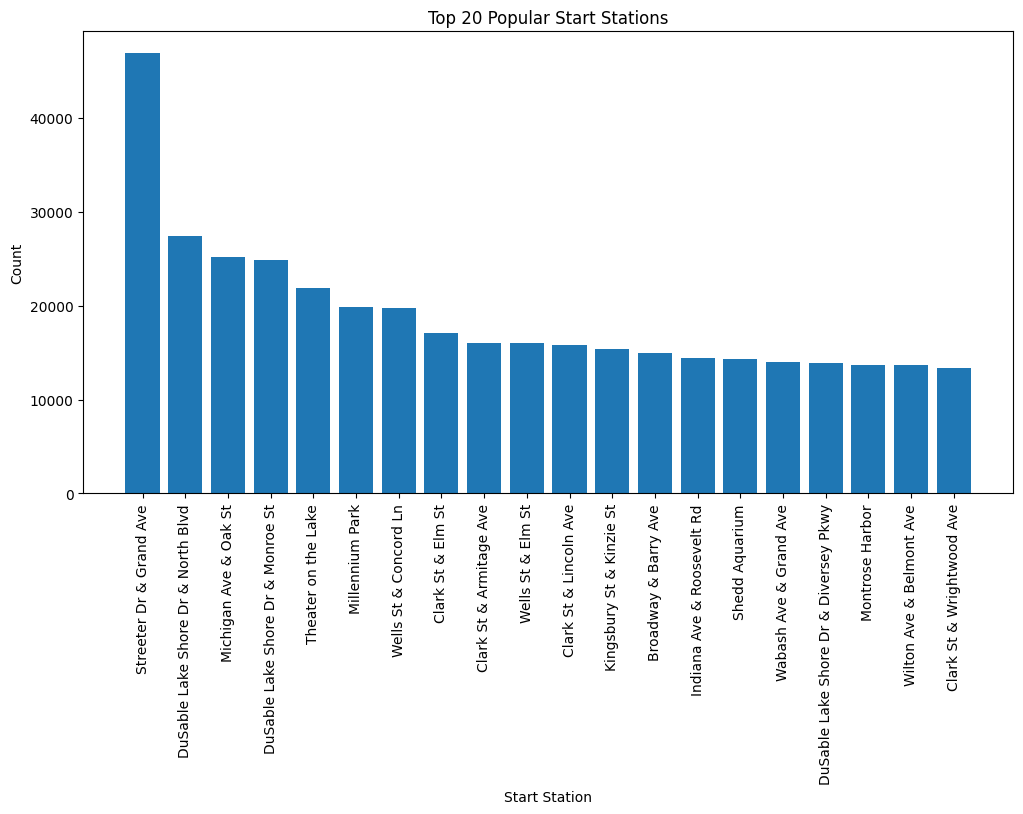

In [ ]:
import matplotlib.pyplot as plt

top_20_start_stations = divvy_df.groupBy("start_station_name").count().orderBy(desc("count")).limit(20)
top_20_start_stations.show()

# Convert DataFrame to Pandas for plotting
top_20_start_stations_pandas = top_20_start_stations.toPandas()

# Plotting the top 20 popular start stations
plt.figure(figsize=(12, 6))
plt.bar(top_20_start_stations_pandas["start_station_name"], top_20_start_stations_pandas["count"])
plt.xticks(rotation=90)
plt.xlabel("Start Station")
plt.ylabel("Count")
plt.title("Top 20 Popular Start Stations")
plt.show()

In [ ]:
from pyspark.sql.functions import count, avg

end_station_avg_count = divvy_df.groupBy("end_station_name").count().agg(avg("count").alias("average_count"))
end_station_avg_count.show()


+------------------+
|     average_count|
+------------------+
|1713.1783393501805|
+------------------+



In [ ]:
from pyspark.sql.functions import desc

popular_end_stations = divvy_df.groupBy("end_station_name").count().orderBy(desc("count"))
top_20_end_stations = popular_end_stations.limit(20)
top_20_end_stations.show()

+--------------------+-----+
|    end_station_name|count|
+--------------------+-----+
|Streeter Dr & Gra...|47671|
|DuSable Lake Shor...|29885|
|Michigan Ave & Oa...|25544|
|DuSable Lake Shor...|24705|
| Theater on the Lake|22360|
|     Millennium Park|20220|
|Wells St & Concor...|19704|
|   Clark St & Elm St|16970|
|Clark St & Armita...|16205|
|Clark St & Lincol...|15970|
|   Wells St & Elm St|15433|
|Broadway & Barry Ave|15235|
|Kingsbury St & Ki...|14882|
|      Shedd Aquarium|14191|
|DuSable Lake Shor...|13965|
|Indiana Ave & Roo...|13922|
|     Montrose Harbor|13727|
|Wilton Ave & Belm...|13623|
|Wabash Ave & Gran...|13558|
|Clark St & Wright...|13293|
+--------------------+-----+



+--------------------+-----+
|    end_station_name|count|
+--------------------+-----+
|Streeter Dr & Gra...|47671|
|DuSable Lake Shor...|29885|
|Michigan Ave & Oa...|25544|
|DuSable Lake Shor...|24705|
| Theater on the Lake|22360|
|     Millennium Park|20220|
|Wells St & Concor...|19704|
|   Clark St & Elm St|16970|
|Clark St & Armita...|16205|
|Clark St & Lincol...|15970|
|   Wells St & Elm St|15433|
|Broadway & Barry Ave|15235|
|Kingsbury St & Ki...|14882|
|      Shedd Aquarium|14191|
|DuSable Lake Shor...|13965|
|Indiana Ave & Roo...|13922|
|     Montrose Harbor|13727|
|Wilton Ave & Belm...|13623|
|Wabash Ave & Gran...|13558|
|Clark St & Wright...|13293|
+--------------------+-----+



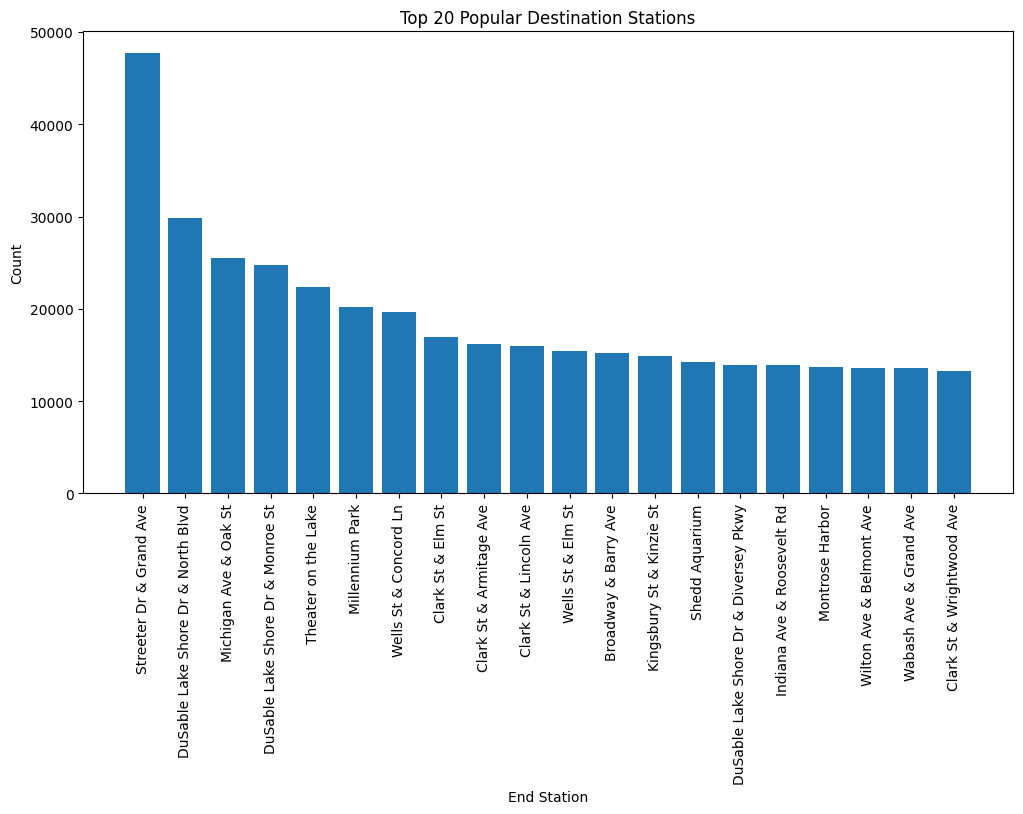

In [ ]:

#Top 20 Popular Destination Stations

top_20_end_stations = divvy_df.groupBy("end_station_name").count().orderBy(desc("count")).limit(20)
top_20_end_stations.show()

# Convert DataFrame to Pandas for plotting
top_20_end_stations_pandas = top_20_end_stations.toPandas()

# Plotting the top 20 popular end stations
plt.figure(figsize=(12, 6))
plt.bar(top_20_end_stations_pandas["end_station_name"], top_20_end_stations_pandas["count"])
plt.xticks(rotation=90)
plt.xlabel("End Station")
plt.ylabel("Count")
plt.title("Top 20 Popular Destination Stations")
plt.show()


In [ ]:
from pyspark.sql.functions import col

# Group data by start and end station pairs and count the trips
busiest_routes = divvy_df.groupBy("start_station_name", "end_station_name").count()

# Sort the counts in descending order to find the busiest routes
busiest_routes = busiest_routes.orderBy(col("count").desc())

# Show the top 10 busiest routes
busiest_routes.show(10)

+--------------------+--------------------+-----+
|  start_station_name|    end_station_name|count|
+--------------------+--------------------+-----+
|Streeter Dr & Gra...|Streeter Dr & Gra...| 8259|
|DuSable Lake Shor...|DuSable Lake Shor...| 4615|
|Michigan Ave & Oa...|Michigan Ave & Oa...| 3975|
|DuSable Lake Shor...|Streeter Dr & Gra...| 3442|
|     Millennium Park|     Millennium Park| 2826|
|     Montrose Harbor|     Montrose Harbor| 2478|
|DuSable Lake Shor...|DuSable Lake Shor...| 2373|
| Theater on the Lake| Theater on the Lake| 2175|
|Streeter Dr & Gra...|DuSable Lake Shor...| 2138|
|Streeter Dr & Gra...|DuSable Lake Shor...| 1959|
+--------------------+--------------------+-----+
only showing top 10 rows



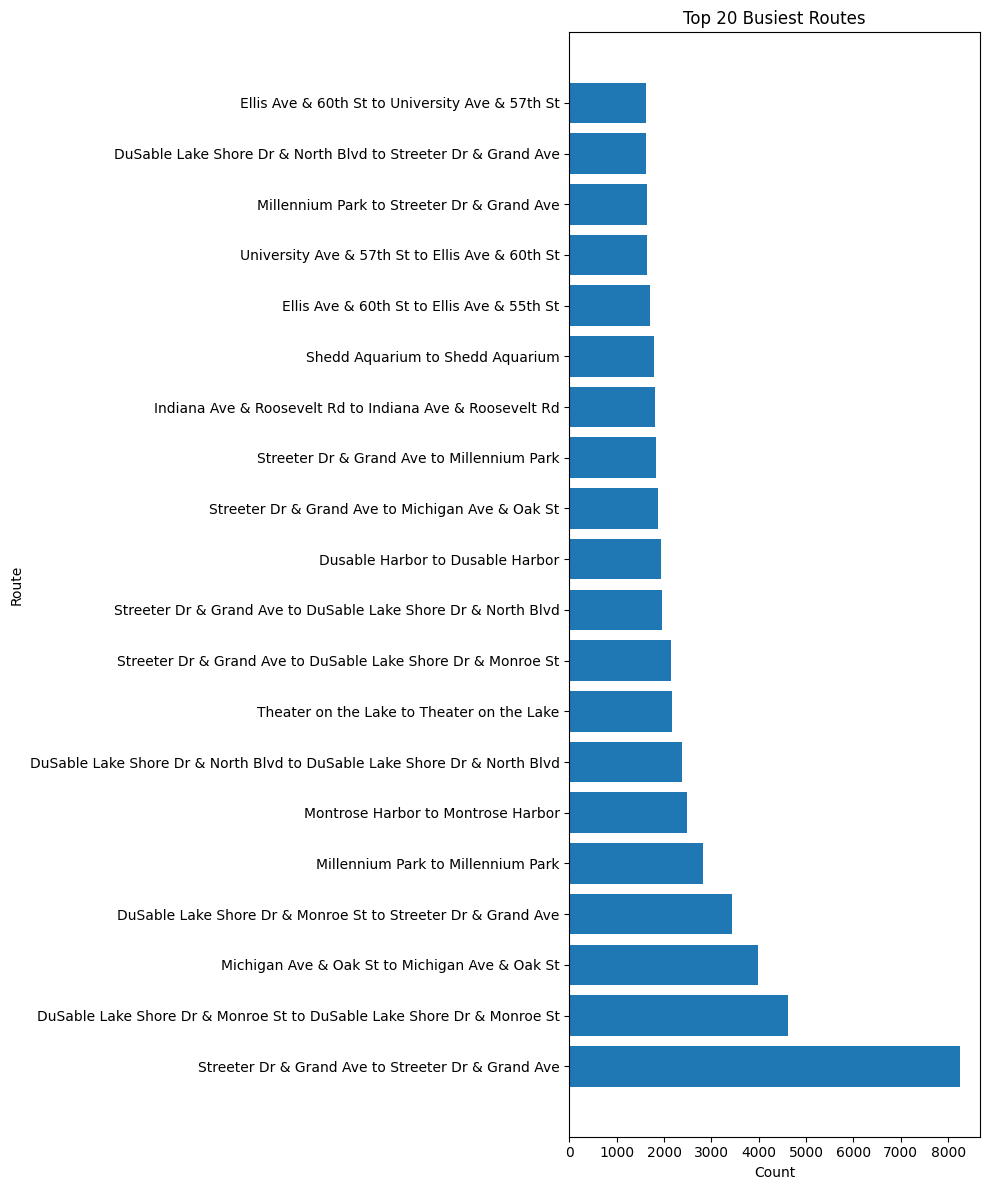

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Assuming you have already defined busiest_routes DataFrame

# Sort the DataFrame by "count" column in descending order and limit to the top 20 routes
busiest_routes_pd = busiest_routes.orderBy(col("count").desc()).limit(20).toPandas()

# Create a bar chart for the top 20 routes
plt.figure(figsize=(10, 12))
plt.barh(busiest_routes_pd["start_station_name"] + " to " + busiest_routes_pd["end_station_name"], busiest_routes_pd["count"])
plt.xlabel("Count")
plt.ylabel("Route")
plt.title("Top 20 Busiest Routes")
plt.tight_layout()
plt.show()


TEMPORAL ANALYSIS

In [ ]:
temporal_df = pd.read_csv("cleaned_dataset.csv")
temporal_df

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,23/05/2022 23:06,23/05/2022 23:40,Wabash Ave & Grand Ave,Halsted St & Roscoe St,41.891466,-87.626761,41.943670,-87.648950,member
1,classic_bike,11/05/2022 08:53,11/05/2022 09:31,DuSable Lake Shore Dr & Monroe St,Field Blvd & South Water St,41.880958,-87.616743,41.886349,-87.617517,member
2,classic_bike,26/05/2022 18:36,26/05/2022 18:58,Clinton St & Madison St,Wood St & Milwaukee Ave,41.882242,-87.641066,41.907655,-87.672552,member
3,classic_bike,10/05/2022 07:30,10/05/2022 07:38,Clinton St & Madison St,Clark St & Randolph St,41.882242,-87.641066,41.884576,-87.631890,member
4,classic_bike,10/05/2022 17:31,10/05/2022 17:36,Clinton St & Madison St,Morgan St & Lake St,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...
2372747,electric_bike,2022-09-04 19:34:22,2022-09-04 19:45:03,Canal St & Jackson Blvd,Stetson Ave & South Water St,41.877412,-87.640076,41.886835,-87.622320,member
2372748,classic_bike,2022-09-15 17:31:15,2022-09-15 17:45:02,State St & Randolph St,McClurg Ct & Ohio St,41.884621,-87.627834,41.892592,-87.617289,member
2372749,electric_bike,2022-09-21 08:23:51,2022-09-21 08:29:29,Michigan Ave & Jackson Blvd,Stetson Ave & South Water St,41.877843,-87.624083,41.886835,-87.622320,member
2372750,docked_bike,2022-09-21 14:46:04,2022-09-21 15:18:02,Michigan Ave & Jackson Blvd,Adler Planetarium,41.877850,-87.624080,41.866095,-87.607267,casual


In [ ]:
temporal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372752 entries, 0 to 2372751
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   rideable_type       object 
 1   started_at          object 
 2   ended_at            object 
 3   start_station_name  object 
 4   end_station_name    object 
 5   start_lat           float64
 6   start_lng           float64
 7   end_lat             float64
 8   end_lng             float64
 9   member_casual       object 
dtypes: float64(4), object(6)
memory usage: 181.0+ MB


In [ ]:
temporal_df.shape

(2372752, 10)

   Month-Year  Ride Count
0     2022-05      357093
1     2022-06      625630
2     2022-07      658789
3     2022-08      617540
4     2022-09       19189
5     2022-10       20700
6     2022-11       19065
7     2022-12       20418
8     2023-01           0
9     2023-02           0
10    2023-03           0
11    2023-04           0


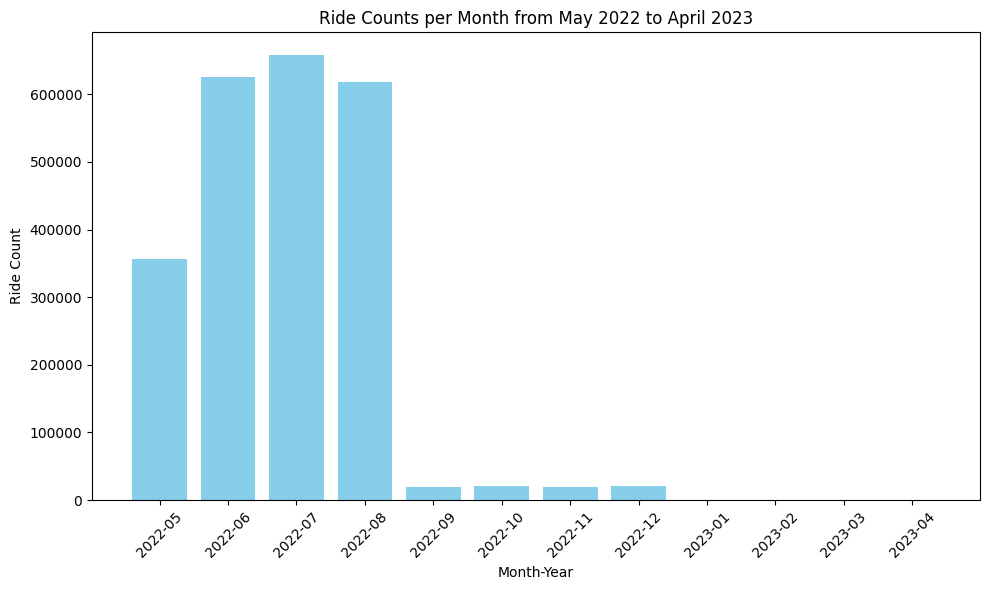

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame 'temporal_df' from the CSV file

# Convert the "started_at" column to pandas datetime format for easy manipulation
temporal_df["started_at"] = pd.to_datetime(temporal_df["started_at"], infer_datetime_format=True)

# Extract the month-year information from the "started_at" column
temporal_df["month_year"] = temporal_df["started_at"].dt.to_period("M")

# Group the data by month-year and calculate the ride counts for each month
ride_counts_per_month = temporal_df["month_year"].value_counts().sort_index()

# Create a DataFrame with all the months from May 2022 to April 2023
all_months_years = pd.period_range(start="2022-05", end="2023-04", freq="M")
all_months_years_str = all_months_years.strftime("%Y-%m")

# Reindex the ride counts with the complete list of month-year strings and fill missing months with zero counts
ride_counts_per_month = ride_counts_per_month.reindex(all_months_years_str, fill_value=0)

# Create a DataFrame with month-year and ride count information
ride_counts_df = pd.DataFrame({
    "Month-Year": all_months_years_str,
    "Ride Count": ride_counts_per_month.values
})

# Display the table of months with their corresponding counts
print(ride_counts_df)

# Plot the ride counts for each month as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ride_counts_per_month.index, ride_counts_per_month, color='skyblue')
plt.xlabel("Month-Year")
plt.ylabel("Ride Count")
plt.title("Ride Counts per Month from May 2022 to April 2023")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


RIDER ANALYSIS


+-------------+-------+
|member_casual|  count|
+-------------+-------+
|       casual|1094987|
|       member|1277765|
+-------------+-------+



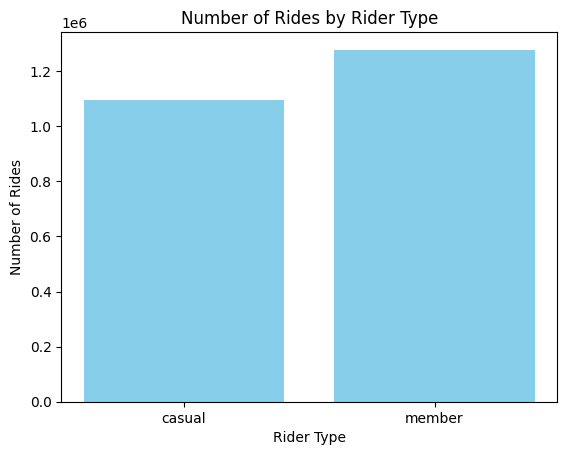

In [ ]:
from pyspark.sql import functions as F

# Group by 'member_casual' and count the number of rides for each type
rider_counts = divvy_df.groupBy('member_casual').count()

# Display the result
rider_counts.show()
# Assuming you have already executed the code to get the 'rider_counts' DataFrame
# Convert the PySpark DataFrame to a Pandas DataFrame
rider_counts_pd = rider_counts.toPandas()

# Plot the data as a bar graph
plt.bar(rider_counts_pd['member_casual'], rider_counts_pd['count'], color='skyblue')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Rider Type')
plt.show()


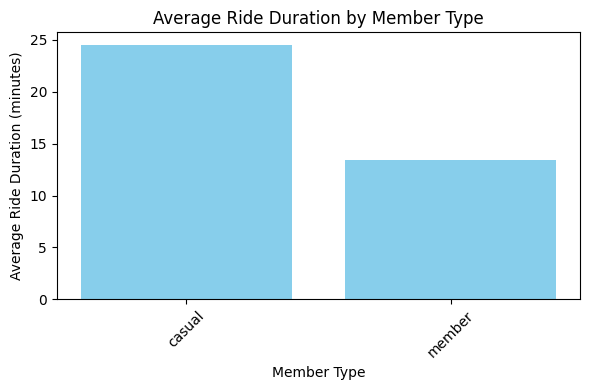

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Assuming you have already calculated 'avg_ride_duration' DataFrame as shown in the code snippet

# Convert the 'avg_ride_duration' DataFrame to Pandas for plotting
avg_ride_duration_pd = avg_ride_duration.toPandas()

# Plot the average ride duration for each member type
plt.figure(figsize=(6, 4))
plt.bar(avg_ride_duration_pd['member_casual'], avg_ride_duration_pd['avg_ride_duration'], color='skyblue')
plt.xlabel("Member Type")
plt.ylabel("Average Ride Duration (minutes)")
plt.title("Average Ride Duration by Member Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Group by 'member_casual' and 'rideable_type' and count the number of rides for each combination
rideable_type_counts = divvy_df.groupBy('member_casual', 'rideable_type').count()

# For each 'member_casual', find the rideable type with the maximum count
from pyspark.sql.window import Window
from pyspark.sql import DataFrame

window_spec = Window.partitionBy('member_casual').orderBy(F.desc('count'))
most_popular_rideable_type = rideable_type_counts.withColumn('rank', F.rank().over(window_spec)).filter(F.col('rank') == 1).drop('rank')

# Show the result for classic bikes
most_popular_rideable_type.filter(F.col('rideable_type') == 'classic_bike').show()


+-------------+-------------+------+
|member_casual|rideable_type| count|
+-------------+-------------+------+
|       casual| classic_bike|579613|
|       member| classic_bike|867357|
+-------------+-------------+------+



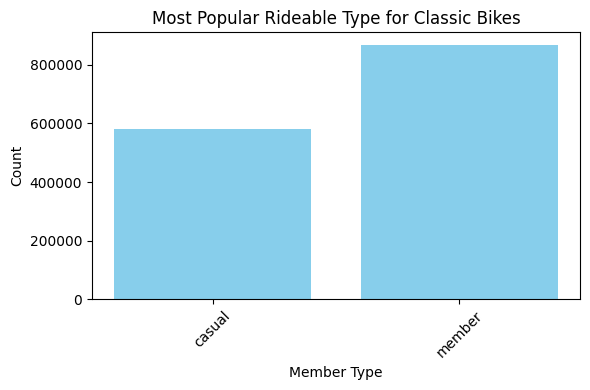

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql.window import Window

# Assuming you have already calculated 'rideable_type_counts' DataFrame as shown in the code snippet

# Filter the DataFrame for classic bikes
classic_bikes_df = rideable_type_counts.filter(F.col('rideable_type') == 'classic_bike').toPandas()

# Plot the most popular rideable type for each member type for classic bikes as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(classic_bikes_df['member_casual'], classic_bikes_df['count'], color='skyblue')
plt.xlabel("Member Type")
plt.ylabel("Count")
plt.title("Most Popular Rideable Type for Classic Bikes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Show the result for electric bikes
most_popular_rideable_type.filter(F.col('rideable_type') == 'electric_bike').show()


+-------------+-------------+-----+
|member_casual|rideable_type|count|
+-------------+-------------+-----+
+-------------+-------------+-----+



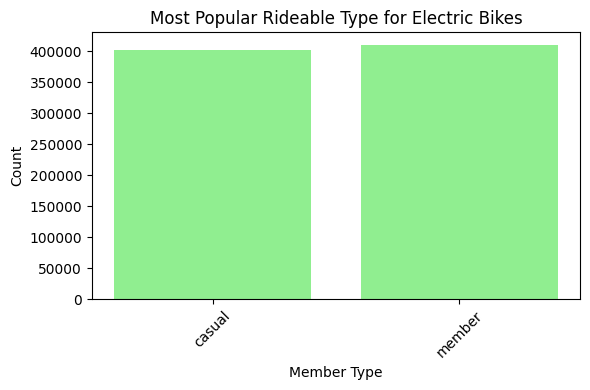

In [ ]:
# Filter the DataFrame for electric bikes
electric_bikes_df = rideable_type_counts.filter(F.col('rideable_type') == 'electric_bike').toPandas()

# Plot the most popular rideable type for each member type for electric bikes as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(electric_bikes_df['member_casual'], electric_bikes_df['count'], color='lightgreen')
plt.xlabel("Member Type")
plt.ylabel("Count")
plt.title("Most Popular Rideable Type for Electric Bikes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Show the result for docked bikes
most_popular_rideable_type.filter(F.col('rideable_type') == 'docked_bike').show()


+-------------+-------------+-----+
|member_casual|rideable_type|count|
+-------------+-------------+-----+
+-------------+-------------+-----+



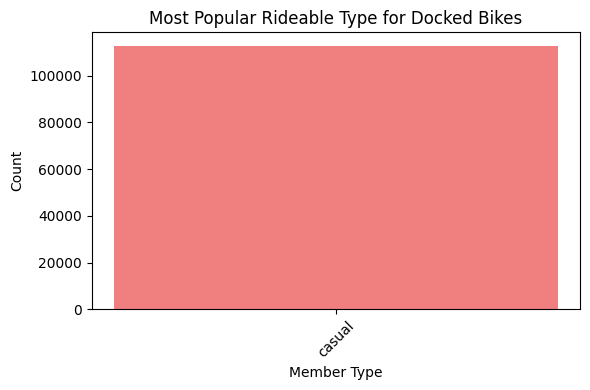

In [ ]:
# Filter the DataFrame for docked bikes
docked_bikes_df = rideable_type_counts.filter(F.col('rideable_type') == 'docked_bike').toPandas()

# Plot the most popular rideable type for each member type for docked bikes as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(docked_bikes_df['member_casual'], docked_bikes_df['count'], color='lightcoral')
plt.xlabel("Member Type")
plt.ylabel("Count")
plt.title("Most Popular Rideable Type for Docked Bikes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FORECASTING




Time Series analysis

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.9 MB/s eta 0:00:00


In [ ]:
# Assuming you have already loaded the DataFrame 'temporal_df' from the CSV file

# Display the column names in the DataFrame
temporal_df.columns

# Display the first few rows of the DataFrame
temporal_df.head()


,rideable_type,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,month_year
started_at,,,,,,,,,,
2022-05-23 23:06:00,classic_bike,23/05/2022 23:40,Wabash Ave & Grand Ave,Halsted St & Roscoe St,41.891466,-87.626761,41.943670,-87.648950,member,2022-05
2022-11-05 08:53:00,classic_bike,11/05/2022 09:31,DuSable Lake Shore Dr & Monroe St,Field Blvd & South Water St,41.880958,-87.616743,41.886349,-87.617517,member,2022-11
2022-05-26 18:36:00,classic_bike,26/05/2022 18:58,Clinton St & Madison St,Wood St & Milwaukee Ave,41.882242,-87.641066,41.907655,-87.672552,member,2022-05
2022-10-05 07:30:00,classic_bike,10/05/2022 07:38,Clinton St & Madison St,Clark St & Randolph St,41.882242,-87.641066,41.884576,-87.631890,member,2022-10
2022-10-05 17:31:00,classic_bike,10/05/2022 17:36,Clinton St & Madison St,Morgan St & Lake St,41.882242,-87.641066,41.885779,-87.651025,member,2022-10


   Month-Year  Ride Count
0     2022-05      357093
1     2022-06      625630
2     2022-07      658789
3     2022-08      617540
4     2022-09       19189
5     2022-10       20700
6     2022-11       19065
7     2022-12       20418
8     2023-01           0
9     2023-02           0
10    2023-03           0
11    2023-04           0


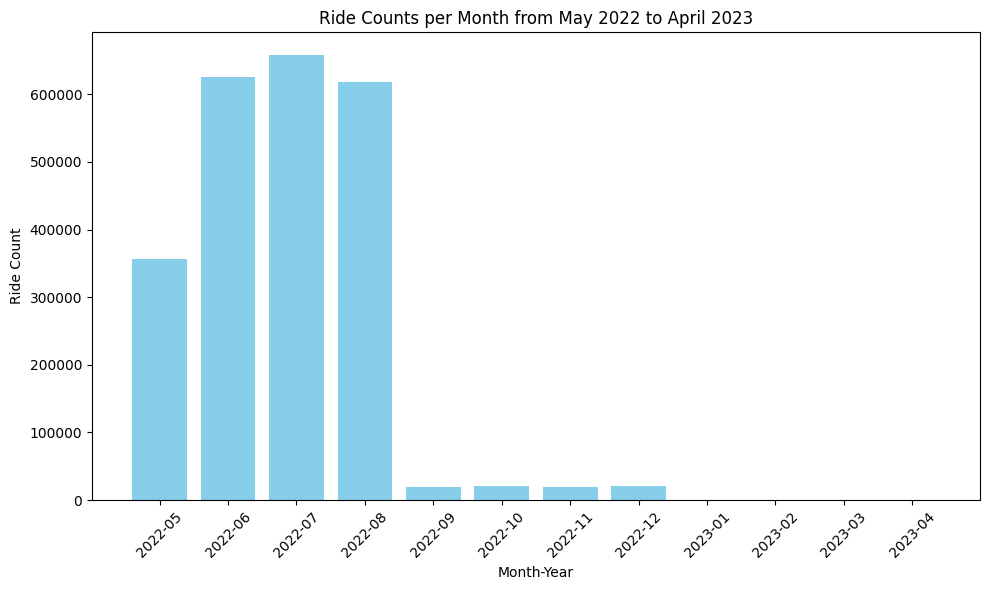

In [ ]:
# Assuming you have already loaded the DataFrame 'temporal_df' from the CSV file

# Reset the index so that "started_at" becomes a regular column in the DataFrame
temporal_df.reset_index(inplace=True)

# Convert the "started_at" column to pandas datetime format for easy manipulation
temporal_df["started_at"] = pd.to_datetime(temporal_df["started_at"], infer_datetime_format=True)

# Extract the month-year information from the "started_at" column
temporal_df["month_year"] = temporal_df["started_at"].dt.to_period("M")

# Group the data by month-year and calculate the ride counts for each month
ride_counts_per_month = temporal_df["month_year"].value_counts().sort_index()

# Create a DataFrame with all the months from May 2022 to April 2023
all_months_years = pd.period_range(start="2022-05", end="2023-04", freq="M")
all_months_years_str = all_months_years.strftime("%Y-%m")

# Reindex the ride counts with the complete list of month-year strings and fill missing months with zero counts
ride_counts_per_month = ride_counts_per_month.reindex(all_months_years_str, fill_value=0)

# Create a DataFrame with month-year and ride count information
ride_counts_df = pd.DataFrame({
    "Month-Year": all_months_years_str,
    "Ride Count": ride_counts_per_month.values
})

# Display the table of months with their corresponding counts
print(ride_counts_df)

# Plot the ride counts for each month as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ride_counts_per_month.index, ride_counts_per_month, color='skyblue')
plt.xlabel("Month-Year")
plt.ylabel("Ride Count")
plt.title("Ride Counts per Month from May 2022 to April 2023")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Convert the "started_at" column to pandas datetime format for easy manipulation
temporal_df["started_at"] = pd.to_datetime(temporal_df["started_at"], infer_datetime_format=True)

# Extract the month-year information from the "started_at" column
temporal_df["month_year"] = temporal_df["started_at"].dt.to_period("M")

# Group the data by month-year and calculate the ride counts for each month
ride_counts_per_month = temporal_df["month_year"].value_counts().sort_index()


In [ ]:
# Create a time series from the ride counts per month
ride_counts_time_series = ride_counts_per_month.to_frame()

# Convert the PeriodIndex to Timestamp for plotting and model training
ride_counts_time_series.index = ride_counts_time_series.index.to_timestamp()


In [ ]:
# For demonstration purposes, we will use a seasonal order of (1, 1, 1, 12)
# You may need to adjust the order and seasonal order based on your data and analysis
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(ride_counts_time_series, order=order, seasonal_order=seasonal_order)
results = model.fit()


In [ ]:

# Step 5: Make predictions for the next six months after April 2023
forecast_periods = 6
last_month = ride_counts_time_series.index[-1]  # Get the last index
forecast_index = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=forecast_periods, freq="M")
forecast = results.forecast(steps=forecast_periods)

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame({
    "Month-Year": forecast_index,
    "Ride Count Forecast": forecast.values
})

# Display the forecasted ride counts for the next six months after April 2023
print(forecast_df)


  Month-Year  Ride Count Forecast
0 2023-01-31         24967.002274
1 2023-02-28         25855.002274
2 2023-03-31         19818.002274
3 2023-04-30         27164.002274
4 2023-05-31        372962.002274
5 2023-06-30        641499.002274


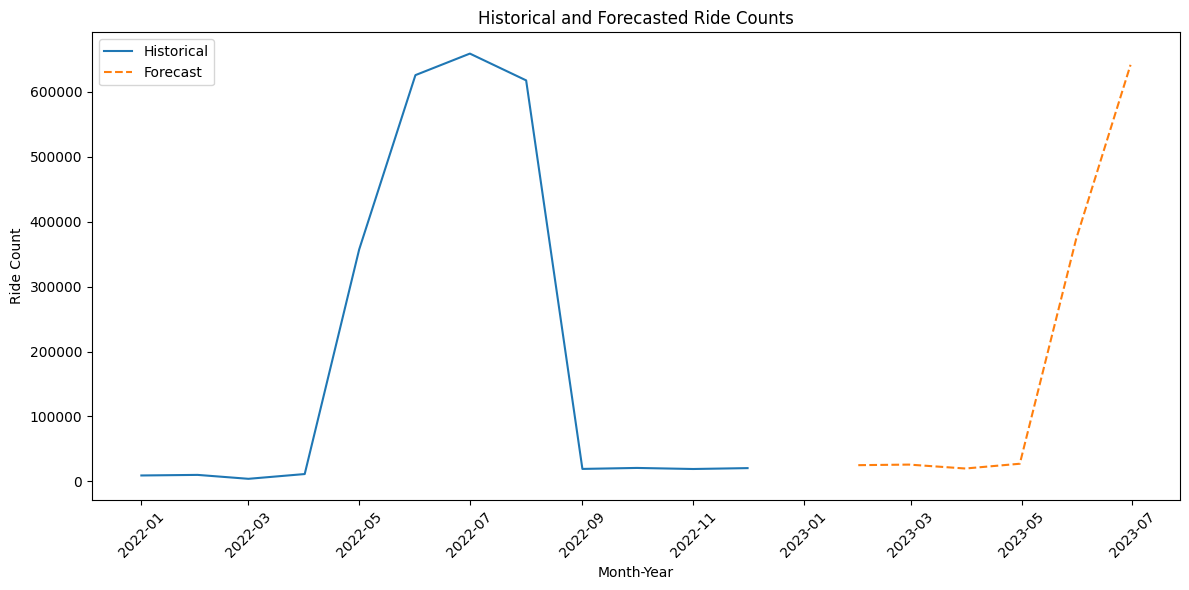

In [ ]:
# Plot the historical ride counts and the forecasted ride counts
plt.figure(figsize=(12, 6))
plt.plot(ride_counts_time_series.index, ride_counts_time_series["month_year"], label="Historical")
plt.plot(forecast_df["Month-Year"], forecast_df["Ride Count Forecast"], label="Forecast", linestyle="--")
plt.xlabel("Month-Year")
plt.ylabel("Ride Count")
plt.title("Historical and Forecasted Ride Counts")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
